This notebook attempts to estimate delaunay triangulization using local measures

In [102]:
import numpy as np
from numpy import pi

import matplotlib.pyplot as plt

from scipy.spatial import Delaunay

In [30]:
# Returns the target as well as the nearest neighbors
def knn_indices(target, points, k):
    
    distances = np.linalg.norm(points.T - target.T, axis=1)
    
    return np.argsort(distances)[:k + 1]

In [82]:
def sub_delaunay(target, points, k, edges):
        
    neighbors_index = knn_indices(target, points, k)
    
    neighbors = points[:, neighbors_index]
    
    tri = Delaunay(neighbors.T)
    
    for i in range(tri.simplices.shape[0]):
        
        if (tri.simplices[i,0] == 0 or tri.simplices[i,1] == 0):
            
            edges[neighbors_index[tri.simplices[i, 0]], neighbors_index[tri.simplices[i, 1]]] = 1
            edges[neighbors_index[tri.simplices[i, 1]], neighbors_index[tri.simplices[i, 0]]] = 1
            
        if (tri.simplices[i,0] == 0 or tri.simplices[i,2] == 0):

            edges[neighbors_index[tri.simplices[i, 0]], neighbors_index[tri.simplices[i, 2]]] = 1
            edges[neighbors_index[tri.simplices[i, 2]], neighbors_index[tri.simplices[i, 0]]] = 1

        if (tri.simplices[i,1] == 0 or tri.simplices[i,2] == 0):
            
            edges[neighbors_index[tri.simplices[i, 1]], neighbors_index[tri.simplices[i, 2]]] = 1
            edges[neighbors_index[tri.simplices[i, 2]], neighbors_index[tri.simplices[i, 1]]] = 1
            
    return edges

In [83]:
def plot(points, edges):
        
        fig, ax = plt.subplots()

        ax.set_aspect( 1 )
        ax.set_xlim((-6,6))
        ax.set_ylim((-6,6))

        fig.set_figheight(15)
        fig.set_figwidth(15)

        # Draw vertices
        plt.scatter(points[0,:], points[1,:])
        
        # Draw edges
        for i in range(0, points.shape[1]):
            
            for j in range(i+1, points.shape[1]):
                
                if (edges[i,j] == 1):
                    
                    plt.plot([points[0,i], points[0,j]], [points[1,i], points[1,j]], 'b')

        
        
        
        plt.show()

        
        return

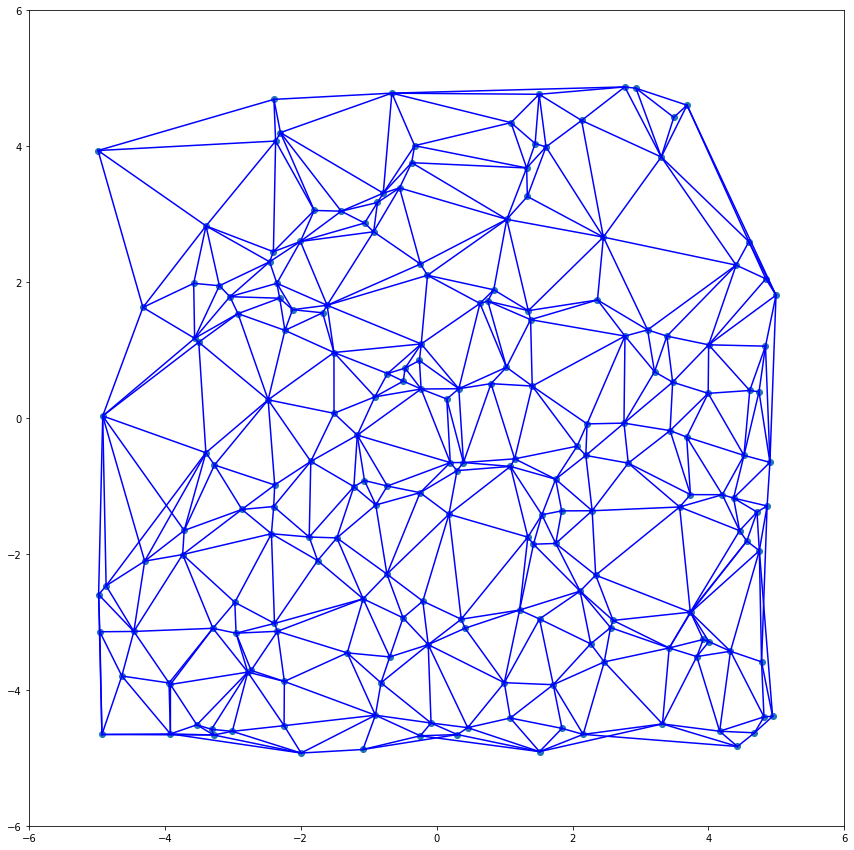

In [99]:
size = 200
k = 20

points = np.random.uniform(-5, 5, (2, size))

edges = np.zeros((size,size))


for i in range(size):
    
    edges = sub_delaunay(points[:,i], points, k, edges)
        
plot(points, edges)


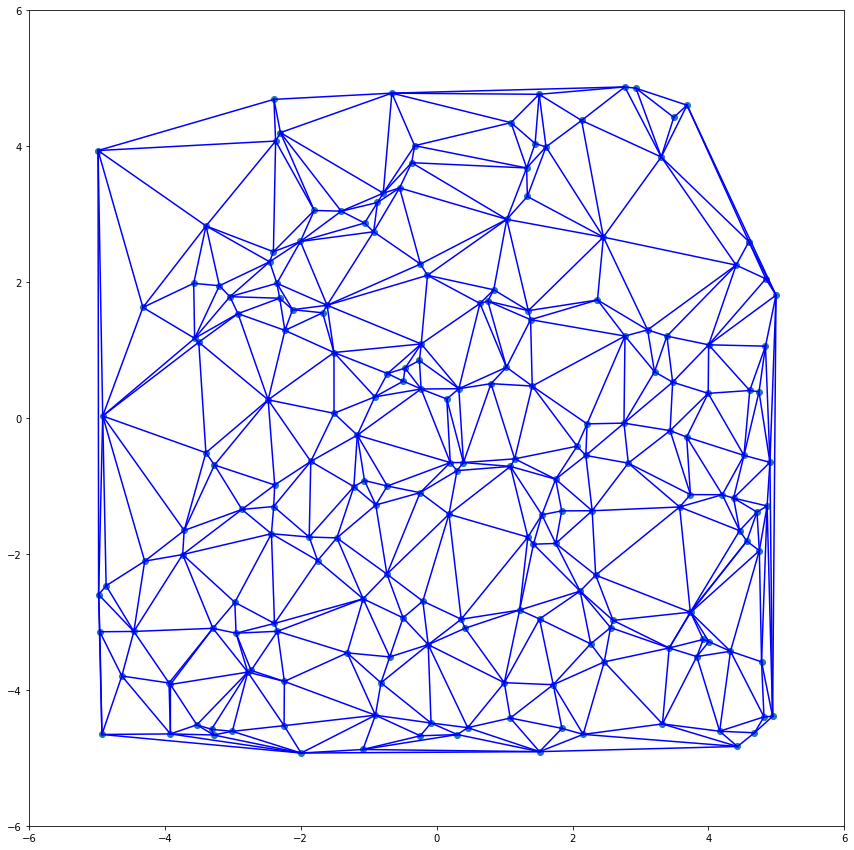

In [100]:
d_edges = np.zeros((size,size))

tri = Delaunay(points.T)
                
for i in range(tri.simplices.shape[0]):

    d_edges[tri.simplices[i, 0], tri.simplices[i, 1]] = 1
    d_edges[tri.simplices[i, 1], tri.simplices[i, 0]] = 1

    d_edges[tri.simplices[i, 0], tri.simplices[i, 2]] = 1
    d_edges[tri.simplices[i, 2], tri.simplices[i, 0]] = 1

    d_edges[tri.simplices[i, 2], tri.simplices[i, 1]] = 1
    d_edges[tri.simplices[i, 1], tri.simplices[i, 2]] = 1
    
plot(points, d_edges)

In [101]:
np.sum(abs(d_edges - edges)) / 2

15.0